# COMP30850- Assignment 1
## 183919333 


In [2]:
# Importing of relevant packagages 
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
%matplotlib inline

## 1. Network construction

In [3]:
#Loading in of Datasets
load_set1=open("18391933-dataset1.json",)
set1_data=json.load(load_set1)
load_set1.close()

load_set2=open("18391933-dataset2.json",)
set2_data=json.load(load_set2)
load_set2.close()

In [4]:
#Adding the JSON datasets to pandas dataframes
set1_df=pd.DataFrame(set1_data)
set2_df=pd.DataFrame(set2_data)

set1_df.head()

,id,name,born,movies
0,000128,Russell Crowe,1964-04-07,"[{'id': '10059518', 'title': 'Unhinged', 'year..."
1,0206257,Rosario Dawson,1979-05-09,"[{'id': '13787320', 'title': 'Rocky Horror Sho..."
2,000905,Roberto Benigni,1952-10-27,"[{'id': '8333746', 'title': 'Pinocchio', 'year..."
3,0001833,Emily Watson,1967-01-14,"[{'id': '10482370', 'title': 'The Third Day', ..."
4,5052065,Ansel Elgort,1994-03-14,"[{'id': '3864056', 'title': 'The Goldfinch', '..."


In [5]:
set2_df.head()

,id,name,born,movies
0,0000538,Colm Meaney,1953-05-30,"[{'id': '13356010', 'title': 'The Monkey', 'ye..."
1,0914455,Leonor Watling,1975-07-28,"[{'id': '10039610', 'title': 'Mi hermano Juan'..."
2,0000932,Halle Berry,1966-08-14,"[{'id': '8310474', 'title': 'Bruised', 'year':..."
3,0000138,Leonardo DiCaprio,1974-11-11,"[{'id': '8690814', 'title': 'Grant', 'year': 2..."
4,0591485,Liza Minnelli,1946-03-12,"[{'id': '10908058', 'title': 'The King of Come..."


In [6]:
#df=pd.concat([set1_df,set2_df])
#df=df.reset_index(drop=True)
#df

In [7]:
#Function to remove unnecessary columns from the datasets
def clean(df):
    del df["id"]
    del df["born"]
    
    
clean(set1_df)
clean(set2_df)

In [8]:
set1_df.head()

,name,movies
0,Russell Crowe,"[{'id': '10059518', 'title': 'Unhinged', 'year..."
1,Rosario Dawson,"[{'id': '13787320', 'title': 'Rocky Horror Sho..."
2,Roberto Benigni,"[{'id': '8333746', 'title': 'Pinocchio', 'year..."
3,Emily Watson,"[{'id': '10482370', 'title': 'The Third Day', ..."
4,Ansel Elgort,"[{'id': '3864056', 'title': 'The Goldfinch', '..."


In [9]:
#Listing the actors by name to use as keys in future dictionarys and nodes
actors1=set1_df["name"]
actors2=set2_df["name"]


In [10]:
#this dictionary will return all the films of a specific actor when you use their name as the key
# in the dictionary
by_actor1={}
i=0
for actor in actors1:
    films=[]                  #The list of films for a given actor
    star=set1_df["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=set1_df["movies"][i][j]["title"]
        films.append(temp)
    
    by_actor1[actor]=films     #Filling in our dictionary
    i=i+1
    
 #######################################################################################   
## Repeating the process for the second dataset
by_actor2={}
i=0
for actor in actors2:
    films=[]
    star=set2_df["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=set2_df["movies"][i][j]["title"]
        films.append(temp)
    
    by_actor2[actor]=films
    i=i+1
    


In [86]:
g1=nx.Graph()

## Use loops and the intersection function to find those that intersect

    
for i in range (len(actors1)-1):     #Comparing the films of actors to find costars
    list1=by_actor1[actors1[i]]
    for j in range(i+1,len(actors1)):
        list1_asSet=set(list1)
        list2=by_actor1[actors1[j]]
        intersection=list(list1_asSet.intersection(list2))  #list of mutually starred films by the two actors
        
        if intersection:
            g1.add_edge(actors1[i],actors1[j], weight=len(intersection))    
           #edges of actors who co-star in more films will be weighted by the number of mutual films they have   
##########################################################################################
#I have chosen this algorithm to populate my graph, as it assembles weighted edges and ignores
# isolated nodes that are independent of the other nodes (i.e has not co-starred with any actors in the dataset)
##########################################################################################
## Repeating the process for the second dataset
g2=nx.Graph()

    
for i in range (len(actors2)-1):
    list1=by_actor2[actors2[i]]
    for j in range(i+1,len(actors2)):
        list1_asSet=set(list1)
        list2=by_actor2[actors2[j]]
        intersection=list(list1_asSet.intersection(list2))
        
        if intersection:
            g2.add_edge(actors2[i],actors2[j], weight=len(intersection))
            

In [96]:
# Functions for displaying data and graphs of our networks
# Function to print edges 
def showEdges(graph):
    for edge in graph.edges(data=True):
        print(edge)

# Function to print nodes 
def showNodes(graph):
    for node in graph.node(data=True):
        print(node)
#function to draw our existing graph
def drawGraph(graph):
    plt.figure(figsize=(20,20))
    nx.draw_networkx(graph, with_labels=True, node_size=700, node_color="cyan" )
    plt.axis("off")
    plt.show()
# Function
def networkSizes(graph):
    print("Number of nodes:",graph.number_of_nodes())
    print("Number of edges:",graph.number_of_edges())

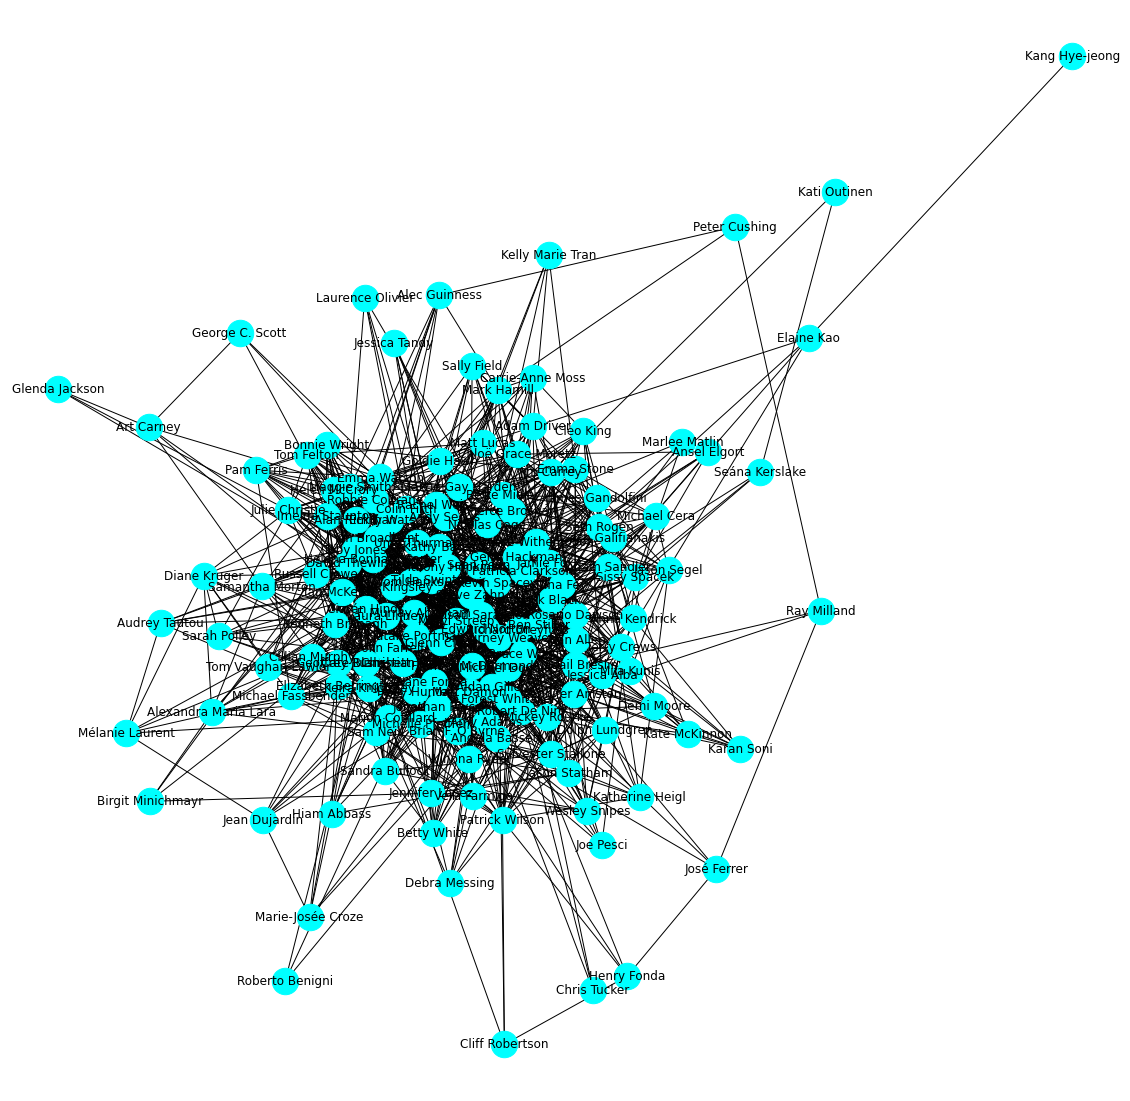

Number of nodes: 148
Number of edges: 1568


In [99]:
drawGraph(g1)
networkSizes(g1)

In [101]:
showEdges(g1)

('Russell Crowe', 'Diane Kruger', {'weight': 1})
('Russell Crowe', 'F. Murray Abraham', {'weight': 1})
('Russell Crowe', 'Toby Jones', {'weight': 1})
('Russell Crowe', 'Christian Bale', {'weight': 1})
('Russell Crowe', 'Helena Bonham Carter', {'weight': 1})
('Russell Crowe', 'Gene Hackman', {'weight': 1})
('Russell Crowe', 'Jane Fonda', {'weight': 1})
('Russell Crowe', 'Cate Blanchett', {'weight': 1})
('Russell Crowe', 'Colin Farrell', {'weight': 1})
('Russell Crowe', 'Ben Kingsley', {'weight': 2})
('Russell Crowe', 'Jim Broadbent', {'weight': 1})
('Russell Crowe', 'Marion Cotillard', {'weight': 1})
('Russell Crowe', 'Amy Adams', {'weight': 1})
('Russell Crowe', 'Kevin Spacey', {'weight': 1})
('Russell Crowe', 'Rachel Weisz', {'weight': 1})
('Russell Crowe', 'Jamie Foxx', {'weight': 1})
('Russell Crowe', 'Susan Sarandon', {'weight': 1})
('Russell Crowe', 'Tilda Swinton', {'weight': 1})
('Russell Crowe', 'Anthony Hopkins', {'weight': 3})
('Russell Crowe', 'Emma Watson', {'weight': 1})
(

('Sean Penn', 'Natalie Portman', {'weight': 1})
('Sean Penn', 'Michelle Pfeiffer', {'weight': 1})
('Sean Penn', 'Laura Linney', {'weight': 1})
('Sean Penn', 'Ben Stiller', {'weight': 2})
('Sean Penn', 'Demi Moore', {'weight': 1})
('Sean Penn', 'Robert De Niro', {'weight': 2})
('Sean Penn', 'George C. Scott', {'weight': 1})
('Sean Penn', 'Jennifer Lopez', {'weight': 1})
('Tom Hanks', 'Jennifer Aniston', {'weight': 1})
('Tom Hanks', 'Audrey Tautou', {'weight': 1})
('Tom Hanks', 'Michael Douglas', {'weight': 1})
('Tom Hanks', 'Angela Bassett', {'weight': 1})
('Tom Hanks', 'Sandra Bullock', {'weight': 1})
('Tom Hanks', 'Laura Linney', {'weight': 1})
('Tom Hanks', 'Betty White', {'weight': 1})
('Tom Hanks', 'Sally Field', {'weight': 3})
('Tom Hanks', 'Ian McKellen', {'weight': 1})
('Jean Dujardin', 'Marie-Josée Croze', {'weight': 1})
('Marie-Josée Croze', 'Aidan Gillen', {'weight': 1})
('Aidan Gillen', 'Ray Milland', {'weight': 1})
('Aidan Gillen', 'Seána Kerslake', {'weight': 1})
('Aidan G

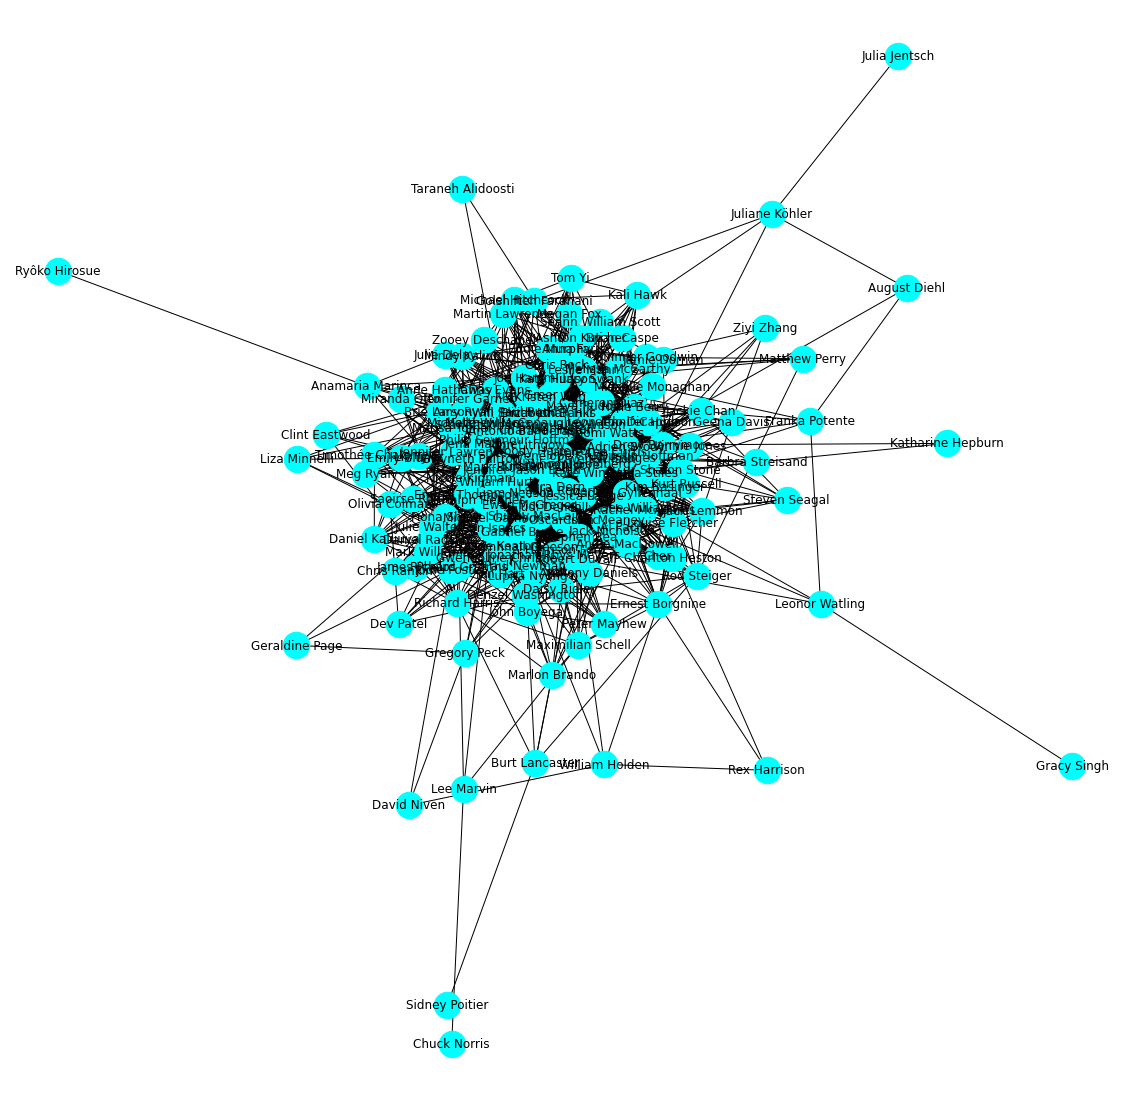

Number of nodes: 162
Number of edges: 1666


In [100]:
drawGraph(g2)
networkSizes(g2)

In [102]:
showEdges(g2)

('Colm Meaney', 'Halle Berry', {'weight': 1})
('Colm Meaney', 'Jason Isaacs', {'weight': 1})
('Colm Meaney', 'Al Pacino', {'weight': 1})
('Colm Meaney', 'Dustin Hoffman', {'weight': 1})
('Colm Meaney', 'Julie Walters', {'weight': 1})
('Colm Meaney', 'Michael Gambon', {'weight': 1})
('Colm Meaney', 'Kali Hawk', {'weight': 1})
('Colm Meaney', 'Owen Wilson', {'weight': 1})
('Colm Meaney', 'Jonah Hill', {'weight': 1})
('Colm Meaney', 'Gabriel Byrne', {'weight': 2})
('Colm Meaney', 'Ian Hart', {'weight': 3})
('Colm Meaney', 'Nicole Kidman', {'weight': 1})
('Colm Meaney', 'William Hurt', {'weight': 1})
('Colm Meaney', 'Ernest Borgnine', {'weight': 1})
('Colm Meaney', 'Woody Harrelson', {'weight': 1})
('Colm Meaney', 'Steven Seagal', {'weight': 1})
('Colm Meaney', 'Whoopi Goldberg', {'weight': 1})
('Colm Meaney', 'Stephen Rea', {'weight': 2})
('Halle Berry', 'Dustin Hoffman', {'weight': 1})
('Halle Berry', 'Penélope Cruz', {'weight': 1})
('Halle Berry', 'Matthew McConaughey', {'weight': 1})
(

## 2. Network characterisation